In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import folium
#import geojson

In [4]:
# Read Data
stockx_data = pd.read_excel("StockX-Data-Contest-2019.xlsx","Raw Data")
stockx_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


In [6]:
stockx_data["Price Premium"] = (stockx_data['Sale Price'] - stockx_data['Retail Price'])/stockx_data['Retail Price']
stockx_data["Revenue"] = stockx_data['Sale Price'] - stockx_data['Retail Price']

In [7]:
stockx_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Price Premium,Revenue
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,3.986364,877.0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,2.113636,465.0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,2.136364,470.0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,3.886364,855.0
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,2.763636,608.0


In [2]:
per_capita = stockx_data['Buyer Region'].value_counts()
per_capita.to_csv('region.csv')
#https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population

NameError: name 'stockx_data' is not defined

In [3]:
region = pd.read_csv("region.csv")
region['per_capita'] = region['Sale']/region['Population']*100000
region_data = pd.DataFrame(region,columns=["Region","per_capita"])
region_data.head()

,Region,per_capita
0,California,48.969657
1,New York,84.945887
2,Oregon,182.111877
3,Florida,29.686554
4,Texas,20.264947


In [6]:
region_data.sort_values(by = 'per_capita',ascending = False)

,Region,per_capita
2,Oregon,182.111877
17,Delaware,127.546305
1,New York,84.945887
5,New Jersey,53.140048
0,California,48.969657
8,Massachusetts,41.772771
36,District of Columbia,38.398921
34,Rhode Island,32.755595
18,Connecticut,31.133538
12,Maryland,30.931177


In [118]:
#!pip install geojson
from geojson import Feature, FeatureCollection, Polygon
import json
with open('US_states.json', 'rb') as f:
    geo = json.load(f)
    
m = folium.Map(location=[37.77, -100], zoom_start=4,tiles=('https://api.tiles.mapbox.com/v4/mapbox.streets/{z}/{x}/{y}.png'
           + '?access_token=pk.eyJ1IjoibHVrYXNtYXJ0aW5lbGxpIiwiYSI6ImNpem8'
           + '5dmhwazAyajIyd284dGxhN2VxYnYifQ.HQCmyhEXZUTz3S98FMrVAQ'),
    attr='United States')
folium.Choropleth(
    geo_data=geo,
    data=region_data,
    columns=["Region","per_capita"],
    key_on='feature.properties.NAME',
    #fill_color='red',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
    legend_name='Resold Per Capita by State Per 100,000'
).add_to(m)
m

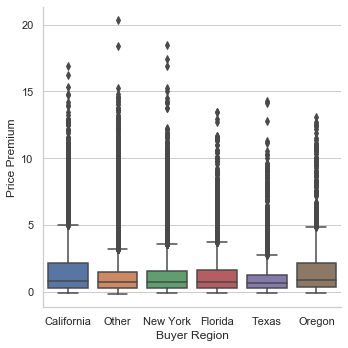

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
premium1 = pd.DataFrame(stockx_data,columns=["Price Premium","Buyer Region"])
above5pct_states = ["California", "New York", "Oregon", "Florida", "Texas"]
premium1["Buyer Region"] = premium1["Buyer Region"].apply(lambda x: x if x in above5pct_states else 'Other')
premium1["Buyer Region"].unique()
sns.set(style = 'whitegrid',color_codes = True)
sns.catplot(x='Buyer Region',y='Price Premium',kind = 'box', data=premium1)
#plt.show()

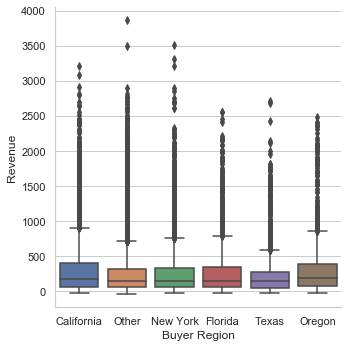

In [24]:
premium2 = pd.DataFrame(stockx_data,columns=["Revenue","Buyer Region"])
premium2["Buyer Region"] = premium2["Buyer Region"].apply(lambda x: x if x in above5pct_states else 'Other')
sns.set(style = 'whitegrid',color_codes = True)
sns.catplot(x='Buyer Region',y='Revenue',kind = 'box', data=premium2)